**Binary Search**

You are given an array of distinct integers nums, sorted in ascending order, and an integer target.

Implement a function to search for target within nums. If it exists, then return its index, otherwise, return -1.

Your solution must run in O(logn) time.

Example 1:

Input: nums = [-1,0,2,4,6,8], target = 4

Output: 3

Example 2:

Input: nums = [-1,0,2,4,6,8], target = 3

Output: -1

In [2]:
# iterative binary search, time complexity = O(logn)
from typing import List
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l,r = 0, len(nums)-1
        while l <= r :
            m = (l+r) //2
            if nums[m] > target:
                r = m - 1
            elif nums[m] < target:
                l = m + 1
            else:
                return m
        return -1
c = Solution()
c.search([-1,0,2,4,6,8],4)

3

In [3]:
#recursive binary search, time complexity = O(logn)
class Solution:
    def binary_search(self, l: int, r: int, nums: List[int], target: int) -> int:
        if l > r:
            return -1
        m = l + (r - l) // 2

        if nums[m] == target:
            return m
        if nums[m] < target:
            return self.binary_search(m + 1, r, nums, target)
        return self.binary_search(l, m - 1, nums, target)

    def search(self, nums: List[int], target: int) -> int:
        return self.binary_search(0, len(nums) - 1, nums, target)
c = Solution()
c.search([-1,0,2,4,6,8],3)

-1

**Search a 2D Matrix**

You are given an m x n 2-D integer array matrix and an integer target.

Each row in matrix is sorted in non-decreasing order.
The first integer of every row is greater than the last integer of the previous row.
Return true if target exists within matrix or false otherwise.

Can you write a solution that runs in O(log(m * n)) time?

Example 1:

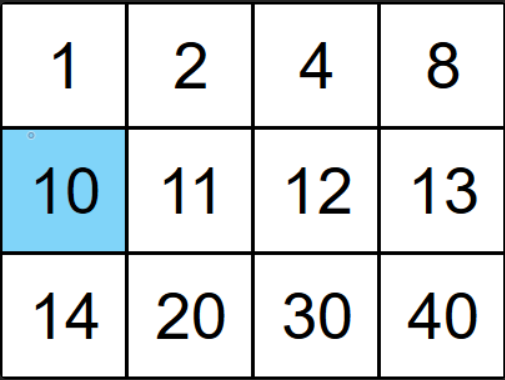

Input: matrix = [[1,2,4,8],[10,11,12,13],[14,20,30,40]], target = 10

Output: true

Example 2:

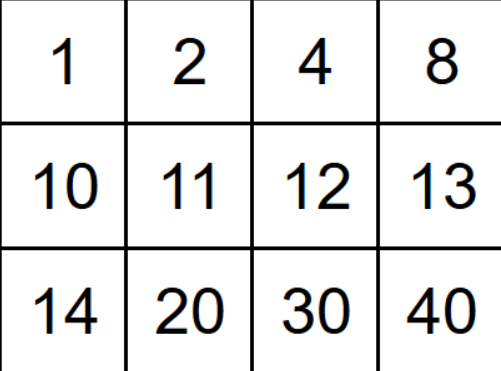

Input: matrix = [[1,2,4,8],[10,11,12,13],[14,20,30,40]], target = 15

Output: false

In [4]:
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        for r in range(len(matrix)):
            for c in range(len(matrix[0])):
                if matrix[r][c] == target:
                    return True
        return False
c = Solution()
c.searchMatrix([[1,2,4,8],[10,11,12,13],[14,20,30,40]],15)

False

In [5]:
#binary search, time complexity - O(log(m*n))
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        ROWS, COLS = len(matrix), len(matrix[0])
        top, bot = 0, ROWS - 1
        target_row = -1 
        
        while top <= bot:
            mid = (top + bot) // 2
            if target < matrix[mid][0]:  # Check the first element of the row
                bot = mid - 1
            elif target >= matrix[mid][0]:
                target_row = mid
                top = mid + 1 
        
        if target_row == -1:
             return False
        
        l, r = 0, COLS - 1
        
        while l <= r:
            m = (l + r) // 2
            
            if target > matrix[target_row][m]:
                l = m + 1
            elif target < matrix[target_row][m]:
                r = m - 1
            else:
                return True
        
        return False
c = Solution()
c.searchMatrix([[1,2,4,8],[10,11,12,13],[14,20,30,40]],13)

True

In [6]:
# Binary search  - one pass, time complexity - O(log(m*n))
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        ROWS, COLS = len(matrix), len(matrix[0])

        l, r = 0, ROWS * COLS - 1
        while l <= r:
            m = l + (r - l) // 2
            row, col = m // COLS, m % COLS
            if target > matrix[row][col]:
                l = m + 1
            elif target < matrix[row][col]:
                r = m - 1
            else:
                return True
        return False
c = Solution()
c.searchMatrix([[1,2,4,8],[10,11,12,13],[14,20,30,40]],13)

True

**Koko Eating Bananas**

You are given an integer array piles where piles[i] is the number of bananas in the ith pile. You are also given an integer h, which represents the number of hours you have to eat all the bananas.

You may decide your bananas-per-hour eating rate of k. Each hour, you may choose a pile of bananas and eats k bananas from that pile. If the pile has less than k bananas, you may finish eating the pile but you can not eat from another pile in the same hour.

Return the minimum integer k such that you can eat all the bananas within h hours.

Example 1:

Input: piles = [1,4,3,2], h = 9

Output: 2

Explanation: With an eating rate of 2, you can eat the bananas in 6 hours. With an eating rate of 1, you would need 10 hours to eat all the bananas (which exceeds h=9), thus the minimum eating rate is 2.

Example 2:

Input: piles = [25,10,23,4], h = 4

Output: 25

In [7]:
#brute force approach - time complexity = O(m*n)
import math
from typing import List
class Solution:
    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        speed = 1
        while True:
            totalTime = 0
            for pile in piles:
                totalTime += math.ceil(pile / speed)

            if totalTime <= h:
                return speed
            speed += 1
        return speed
c= Solution()
c.minEatingSpeed([3,6,7,11],8)

4

In [8]:
#binary search  - time complexity O(n*logm)
from typing import List
import math
class Solution:
    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        l,r = 1,max(piles)
        res = r
        while l <= r: #O(logm)
            hours = 0
            k = (l+r) // 2
            for p in piles: #O(n)
                hours += math.ceil(p/k)
            if hours <= h:
                res = min(res,k)
                r = k-1
            else:
                l = k+1
        return res
c= Solution()
c.minEatingSpeed([3,6,7,11],8)

4

**Find Minimum in Rotated Sorted Array**

You are given an array of length n which was originally sorted in ascending order. It has now been rotated between 1 and n times. For example, the array nums = [1,2,3,4,5,6] might become:

[3,4,5,6,1,2] if it was rotated 4 times.
[1,2,3,4,5,6] if it was rotated 6 times.
Notice that rotating the array 4 times moves the last four elements of the array to the beginning. Rotating the array 6 times produces the original array.

Assuming all elements in the rotated sorted array nums are unique, return the minimum element of this array.

A solution that runs in O(n) time is trivial, can you write an algorithm that runs in O(log n) time?

Example 1:

Input: nums = [3,4,5,6,1,2]
Output: 1

Example 2:

Input: nums = [4,5,0,1,2,3]
Output: 0

Example 3:

Input: nums = [4,5,6,7]
Output: 4

In [9]:
def findmin(nums):
    min = float('inf')
    for i in nums: #O(n)
        if i < min:
            min = i
        else:
            pass
    return min
findmin([4,5,6,7])

4

In [20]:
#let's find it within O(logn)
def findmin(nums):
    res = nums[0]
    l,r = 0,len(nums)-1
    while l <= r:
        if nums[l]< nums[r]:
            res = min(res,nums[l])
            break
        m = (l+r)//2
        res = min(res,nums[m])
        if nums[m] >= nums[l]:
            l = m+ 1
        else:
            r = m-1
    return res
findmin([4,5,6,1,2,3])

1

In [17]:
# binary search lower bound - time complexity (logn)
class Solution:
    def search(self, nums: List[int]) -> int:
        l, r = 0, len(nums) - 1
        while l < r:
            m = l + (r - l) // 2
            if nums[m] < nums[r]:
                r = m
            else:
                l = m + 1
        return nums[l]
c = Solution()
c.search([3,4,5,1,2])

1

**Search in Rotated Sorted Array**

You are given an array of length n which was originally sorted in ascending order. It has now been rotated between 1 and n times. For example, the array nums = [1,2,3,4,5,6] might become:

[3,4,5,6,1,2] if it was rotated 4 times.
[1,2,3,4,5,6] if it was rotated 6 times.
Given the rotated sorted array nums and an integer target, return the index of target within nums, or -1 if it is not present.

You may assume all elements in the sorted rotated array nums are unique,

A solution that runs in O(n) time is trivial, can you write an algorithm that runs in O(log n) time?

Example 1:
Input: nums = [3,4,5,6,1,2], target = 1
Output: 4

Example 2:
Input: nums = [3,5,6,0,1,2], target = 4
Output: -1

In [11]:
#brute force approach
def search(nums,target):
    if target not in nums:
        return -1
    for i in range(len(nums)):
        if nums[i] == target:
            return i
        else:
            pass
search([3,4,5,6,1,2],1)

4

In [12]:
# binary search - time complexity (logn)
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1

        while l < r:
            m = (l + r) // 2
            if nums[m] > nums[r]:
                l = m + 1
            else:
                r = m

        pivot = l

        def binary_search(left: int, right: int) -> int:
            while left <= right:
                mid = (left + right) // 2
                if nums[mid] == target:
                    return mid
                elif nums[mid] < target:
                    left = mid + 1
                else:
                    right = mid - 1
            return -1

        result = binary_search(0, pivot - 1)
        if result != -1:
            return result

        return binary_search(pivot, len(nums) - 1)
c = Solution()
c.search([3,4,5,1,2],4)

1

In [21]:
# binary search, 2 pass - time complexity (logn)
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1

        while l < r:
            m = (l + r) // 2
            if nums[m] > nums[r]:
                l = m + 1
            else:
                r = m

        pivot = l
        l, r = 0, len(nums) - 1

        if target >= nums[pivot] and target <= nums[r]:
            l = pivot
        else:
            r = pivot - 1

        while l <= r:
            m = (l + r) // 2
            if nums[m] == target:
                return m
            elif nums[m] < target:
                l = m + 1
            else:
                r = m - 1

        return -1
c = Solution()
c.search([3,4,5,1,2],4)

1

In [22]:
#leetcode problem - find the index of the target instead of minimum - time complexity O(logn)
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1

        while l <= r:
            m = (l + r) // 2

            if nums[m] == target:
                return m
            if nums[l] <= nums[m]:
                if nums[l] <= target < nums[m]:
                    r = m - 1  
                else:
                    l = m + 1 
            else:
                if nums[m] < target <= nums[r]:
                    l = m + 1  
                else:
                    r = m - 1  

        return -1 
c = Solution()
c.search([3,4,5,1,2],4)

1

**Time Based Key-Value Store**

Implement a time-based key-value data structure that supports:

Storing multiple values for the same key at specified time stamps
Retrieving the key's value at a specified timestamp

Implement the TimeMap class:

TimeMap() Initializes the object.
void set(String key, String value, int timestamp) Stores the key key with the value value at the given time timestamp.
String get(String key, int timestamp) Returns the most recent value of key if set was previously called on it and the most recent timestamp for that key prev_timestamp is less than or equal to the given timestamp (prev_timestamp <= timestamp). If there are no values, it returns "".

Note: For all calls to set, the timestamps are in strictly increasing order.

Example 1:

Input:
["TimeMap", "set", ["alice", "happy", 1], "get", ["alice", 1], "get", ["alice", 2], "set", ["alice", "sad", 3], "get", ["alice", 3]]

Output:
[null, null, "happy", "happy", null, "sad"]

Explanation:

TimeMap timeMap = new TimeMap();

timeMap.set("alice", "happy", 1);  // store the key "alice" and value "happy" along with timestamp = 1.

timeMap.get("alice", 1);           // return "happy"

timeMap.get("alice", 2);           // return "happy", there is no value stored for timestamp 2, thus we return the value at timestamp 1.

timeMap.set("alice", "sad", 3);    // store the key "alice" and value "sad" along with timestamp = 3.

timeMap.get("alice", 3);           // return "sad"

In [ ]:
#brute force approach time complexity - O(m*n)
class TimeMap:

    def __init__(self):
        self.keyStore = {}

    def set(self, key: str, value: str, timestamp: int) -> None:
        if key not in self.keyStore:
            self.keyStore[key] = {}
        if timestamp not in self.keyStore[key]:
            self.keyStore[key][timestamp] = []
        self.keyStore[key][timestamp].append(value)

    def get(self, key: str, timestamp: int) -> str:
        if key not in self.keyStore:
            return ""
        seen = 0

        for time in self.keyStore[key]:
            if time <= timestamp:
                seen = max(seen, time)
        return "" if seen == 0 else self.keyStore[key][seen][-1]

In [ ]:
#bary search - array - Time complexity: O(1) for set() and O(logn) for get().Space complexity: O(m*n)
from collections import defaultdict
class TimeMap:

    def __init__(self):
        self.store = defaultdict(list)

    def set(self, key: str, value: str, timestamp: int) -> None:
        self.store[key].append([value,timestamp])

    def get(self, key: str, timestamp: int) -> str:
        res = ""
        values = self.store.get(key,[])
        l,r = 0,len(values)-1
        while l <= r:
            m = (l+r) // 2
            if values[m][1] <= timestamp:
                res = values[m][0]
                l  = m +1
            else:
                r = m - 1
        return res

In [25]:
# --- Execution Simulation ---

# The list of instructions provided by the platform
instructions = [
    "TimeMap", 
    ["alice", "happy", 1], 
    ["alice", 1], 
    ["alice", 2], 
    ["alice", "sad", 3], 
    ["alice", 3]
]

# 1. Initialize the TimeMap (Corresponds to "TimeMap")
time_map = TimeMap()
output = [None] # Convention: The constructor returns None

# 2. Execute the sequence of instructions
print("--- Execution Trace ---")

# The instructions start at index 1 since index 0 is the constructor name
for i in range(1, len(instructions)):
    instruction_data = instructions[i]
    
    # Determine which method to call based on the number of arguments
    if len(instruction_data) == 3:
        # Call set(key, value, timestamp)
        key, value, timestamp = instruction_data
        time_map.set(key, value, timestamp)
        result = None # set() returns nothing
        print(f"SET('{key}', '{value}', {timestamp}) -> None")
        
    elif len(instruction_data) == 2:
        # Call get(key, timestamp)
        key, timestamp = instruction_data
        result = time_map.get(key, timestamp)
        print(f"GET('{key}', {timestamp}) -> '{result}'")
        
    output.append(result)

print("\nFinal Output Sequence (matches platform expected format):")
print(output)

--- Execution Trace ---
SET('alice', 'happy', 1) -> None
GET('alice', 1) -> 'happy'
GET('alice', 2) -> 'happy'
SET('alice', 'sad', 3) -> None
GET('alice', 3) -> 'sad'

Final Output Sequence (matches platform expected format):
[None, None, 'happy', 'happy', None, 'sad']


**Median of Two Sorted Arrays**

You are given two integer arrays nums1 and nums2 of size m and n respectively, where each is sorted in ascending order. Return the median value among all elements of the two arrays.

Your solution must run in O(log(m+n)) time.

Example 1:

Input: nums1 = [1,2], nums2 = [3]

Output: 2.0
Explanation: Among [1, 2, 3] the median is 2.

Example 2:

Input: nums1 = [1,3], nums2 = [2,4]

Output: 2.5
Explanation: Among [1, 2, 3, 4] the median is (2 + 3) / 2 = 2.5.

In [28]:
#brute force - time complexity - O((n+m)log(n+m))
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        len1 = len(nums1)
        len2 = len(nums2)
        merged = nums1 + nums2
        merged.sort()

        totalLen = len(merged)
        if totalLen % 2 == 0:
            return (merged[totalLen // 2 - 1] + merged[totalLen // 2]) / 2.0
        else:
            return merged[totalLen // 2]
c = Solution()
c.findMedianSortedArrays([1,3],[2,4])

2.5

In [27]:
#brute force - time complexity - O((n+m)
class Solution:
    def findMedianSortedArrays(self, nums1, nums2):
        len1, len2 = len(nums1), len(nums2)
        i = j = 0
        median1 = median2 = 0

        for count in range((len1 + len2) // 2 + 1):
            median2 = median1
            if i < len1 and j < len2:
                if nums1[i] > nums2[j]:
                    median1 = nums2[j]
                    j += 1
                else:
                    median1 = nums1[i]
                    i += 1
            elif i < len1:
                median1 = nums1[i]
                i += 1
            else:
                median1 = nums2[j]
                j += 1

        if (len1 + len2) % 2 == 1:
            return float(median1)
        else:
            return (median1 + median2) / 2.0
c = Solution()
c.findMedianSortedArrays([1,3],[2,4])

2.5

In [ ]:
#binary search, time complexity O(log(min(n,m)))
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        A, B = nums1, nums2
        total = len(nums1) + len(nums2)
        half = total // 2

        if len(B) < len(A): # A is smaller than B in length
            A, B = B, A

        l, r = 0, len(A) - 1
        while True:
            i = (l + r) // 2
            j = half - i - 2

            Aleft = A[i] if i >= 0 else float("-infinity")
            Aright = A[i + 1] if (i + 1) < len(A) else float("infinity")
            Bleft = B[j] if j >= 0 else float("-infinity")
            Bright = B[j + 1] if (j + 1) < len(B) else float("infinity")

            #partition is correct
            if Aleft <= Bright and Bleft <= Aright:
                #odd
                if total % 2:
                    return min(Aright, Bright)
                #even
                return (max(Aleft, Bleft) + min(Aright, Bright)) / 2
            elif Aleft > Bright:
                r = i - 1
            else:
                l = i + 1
c = Solution()
c.findMedianSortedArrays([1,3],[2,4])

2.5